In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import skvideo.io
from tqdm import tqdm
%matplotlib inline

In [2]:
# paths
DATA_PATH = '/home/ubuntu/repositories/speed-challenge/data'
TRAIN_VIDEO = os.path.join(DATA_PATH, 'train.mp4')
TEST_VIDEO = os.path.join(DATA_PATH, 'test.mp4')
PREPARED_DATA_PATH = '/home/ubuntu/repositories/speed-challenge/prepared-data'
PREPARED_IMGS_TRAIN = os.path.join(PREPARED_DATA_PATH, 'train_imgs')
PREPARED_IMGS_TEST = os.path.join(PREPARED_DATA_PATH, 'test_imgs')

TRAIN_FRAMES = 20400
TEST_FRAMES = 10798

In [3]:
#Init tqdm
from multiprocessing import Lock
tqdm.set_lock(Lock())  # manually set internal lock

In [4]:
train_y = list(pd.read_csv(os.path.join(DATA_PATH, 'train.txt'), header=None, squeeze=True))

In [5]:
assert(len(train_y)==TRAIN_FRAMES)

In [8]:
def prepare_dataset(video_loc, img_folder, dataset_type):
    meta_dict = {}

    tqdm.write('reading in video file...')
    cap = skvideo.io.vread(video_loc)
     
    tqdm.write('constructing dataset...')
    for idx, frame in enumerate(tqdm(cap)):    
        img_path = os.path.join(img_folder, str(idx)+'.jpg')
        frame_speed = float('NaN') if dataset_type == 'test' else train_y[idx]
        meta_dict[idx] = [img_path, idx, frame_speed]
        skvideo.io.vwrite(img_path, frame)
    meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
    meta_df.columns = ['image_path', 'image_index', 'speed']
    
    tqdm.write('writing meta to csv')
    meta_df.to_csv(os.path.join(PREPARED_DATA_PATH, dataset_type+'_meta.csv'), index=False)
    
    return "done dataset_constructor"

In [9]:
# train data
prepare_dataset(TRAIN_VIDEO, PREPARED_IMGS_TRAIN, 'train')

 37%|███▋      | 7526/20400 [08:02<13:44, 15.62it/s]

reading in video file...


  0%|          | 2/20400 [00:00<25:25, 13.37it/s]

constructing dataset...



  1%|▏         | 300/20400 [00:23<25:53, 12.94it/s]


  3%|▎         | 596/20400 [00:46<25:35, 12.90it/s]


  4%|▍         | 892/20400 [01:08<25:11, 12.90it/s]


  6%|▌         | 1186/20400 [01:31<24:32, 13.04it/s]


  7%|▋         | 1478/20400 [01:54<24:16, 12.99it/s]


  9%|▊         | 1770/20400 [02:16<23:59, 12.94it/s]


 10%|█         | 2062/20400 [02:39<23:32, 12.98it/s]


 12%|█▏        | 2354/20400 [03:01<23:11, 12.97it/s]


 13%|█▎        | 2646/20400 [03:24<22:49, 12.97it/s]


 14%|█▍        | 2938/20400 [03:47<22:23, 13.00it/s]


 16%|█▌        | 3230/20400 [04:09<22:09, 12.91it/s]


 17%|█▋        | 3522/20400 [04:32<21:55, 12.83it/s]


 19%|█▊        | 3814/20400 [04:55<21:21, 12.95it/s]


 20%|██        | 4106/20400 [05:17<21:03, 12.90it/s]


 22%|██▏       | 4398/20400 [05:40<20:34, 12.96it/s]


 23%|██▎       | 4690/20400 [06:02<20:10, 12.98it/s]


 24%|██▍       | 4982/20400 [06:25<19:45, 13.00it/s]


 26%|██▌       | 5274/20400 [06:47<19:29, 12.93it/s]


 27%|██▋       | 5566/20400 [07:10<19:17, 12.81it/s]


 29%|██▊       | 5858/20400 [07:33<18:37, 13.02it/s]


 30%|███       | 6150/20400 [07:56<18:27, 12.87it/s]


 32%|███▏      | 6442/20400 [08:18<18:10, 12.80it/s]


 33%|███▎      | 6734/20400 [08:41<17:33, 12.97it/s]


 34%|███▍      | 7026/20400 [09:04<17:15, 12.91it/s]


 36%|███▌      | 7318/20400 [09:27<17:06, 12.74it/s]


 37%|███▋      | 7610/20400 [09:49<16:31, 12.90it/s]


 39%|███▊      | 7902/20400 [10:12<16:09, 12.89it/s]


 40%|████      | 8194/20400 [10:35<15:46, 12.89it/s]


 42%|████▏     | 8486/20400 [10:57<15:23, 12.90it/s]


 43%|████▎     | 8778/20400 [11:20<15:01, 12.89it/s]


 44%|████▍     | 9070/20400 [11:43<14:47, 12.76it/s]


 46%|████▌     | 9362/20400 [12:06<14:29, 12.70it/s]


 47%|████▋     | 9654/20400 [12:28<13:52, 12.90it/s]


 49%|████▉     | 9946/20400 [12:51<13:33, 12.85it/s]


 50%|█████     | 10234/20400 [13:13<13:05, 12.95it/s]


 52%|█████▏    | 10520/20400 [13:35<12:40, 12.98it/s]


 53%|█████▎    | 10806/20400 [13:58<12:33, 12.74it/s]


 54%|█████▍    | 11092/20400 [14:20<12:15, 12.65it/s]


 56%|█████▌    | 11378/20400 [14:42<11:40, 12.89it/s]


 57%|█████▋    | 11664/20400 [15:04<11:23, 12.79it/s]


 59%|█████▊    | 11950/20400 [15:27<10:58, 12.84it/s]


 60%|█████▉    | 12236/20400 [15:49<10:29, 12.96it/s]


 61%|██████▏   | 12522/20400 [16:11<10:09, 12.93it/s]


 63%|██████▎   | 12808/20400 [16:33<09:47, 12.92it/s]


 64%|██████▍   | 13094/20400 [16:55<09:25, 12.91it/s]


 66%|██████▌   | 13380/20400 [17:18<09:08, 12.80it/s]


 67%|██████▋   | 13666/20400 [17:40<08:40, 12.93it/s]


 68%|██████▊   | 13952/20400 [18:02<08:22, 12.82it/s]


 70%|██████▉   | 14238/20400 [18:24<07:57, 12.91it/s]


 71%|███████   | 14524/20400 [18:46<07:35, 12.91it/s]


 73%|███████▎  | 14810/20400 [19:09<07:12, 12.93it/s]


 74%|███████▍  | 15096/20400 [19:31<06:52, 12.86it/s]


 75%|███████▌  | 15382/20400 [19:53<06:30, 12.87it/s]


 77%|███████▋  | 15668/20400 [20:15<06:10, 12.77it/s]


 78%|███████▊  | 15954/20400 [20:38<05:51, 12.65it/s]


 80%|███████▉  | 16240/20400 [21:00<05:23, 12.87it/s]


 81%|████████  | 16526/20400 [21:23<05:04, 12.73it/s]


 82%|████████▏ | 16812/20400 [21:45<04:41, 12.76it/s]


 84%|████████▍ | 17098/20400 [22:07<04:16, 12.88it/s]


 85%|████████▌ | 17384/20400 [22:30<03:58, 12.63it/s]


 87%|████████▋ | 17670/20400 [22:52<03:32, 12.83it/s]


 88%|████████▊ | 17956/20400 [23:15<03:10, 12.83it/s]


 89%|████████▉ | 18242/20400 [23:37<02:47, 12.85it/s]


 91%|█████████ | 18528/20400 [23:59<02:26, 12.79it/s]


 92%|█████████▏| 18814/20400 [24:21<02:03, 12.84it/s]


 94%|█████████▎| 19100/20400 [24:44<01:40, 12.93it/s]


 95%|█████████▌| 19386/20400 [25:06<01:18, 12.92it/s]


 96%|█████████▋| 19672/20400 [25:28<00:56, 12.84it/s]


 98%|█████████▊| 19958/20400 [25:51<00:34, 12.84it/s]


 99%|█████████▉| 20244/20400 [26:13<00:12, 12.87it/s]


 37%|███▋      | 7526/20400 [34:57<13:44, 15.62it/s]

writing meta to csv


'done dataset_constructor'

In [10]:
# test data
prepare_dataset(TEST_VIDEO, PREPARED_IMGS_TEST, 'test')

 37%|███▋      | 7526/20400 [35:25<13:44, 15.62it/s]

reading in video file...


  0%|          | 2/10798 [00:00<12:56, 13.90it/s]

constructing dataset...



  3%|▎         | 300/10798 [00:21<12:35, 13.89it/s]


  6%|▌         | 596/10798 [00:42<12:12, 13.92it/s]


  8%|▊         | 892/10798 [01:04<11:52, 13.90it/s]


 11%|█         | 1186/10798 [01:25<11:35, 13.81it/s]


 14%|█▎        | 1478/10798 [01:46<11:16, 13.79it/s]


 16%|█▋        | 1770/10798 [02:07<10:55, 13.78it/s]


 19%|█▉        | 2062/10798 [02:28<10:35, 13.74it/s]


 22%|██▏       | 2354/10798 [02:49<10:05, 13.96it/s]


 25%|██▍       | 2646/10798 [03:10<09:56, 13.68it/s]


 27%|██▋       | 2938/10798 [03:31<09:26, 13.87it/s]


 30%|██▉       | 3230/10798 [03:52<09:03, 13.93it/s]


 33%|███▎      | 3522/10798 [04:13<08:39, 13.99it/s]


 35%|███▌      | 3814/10798 [04:34<08:22, 13.90it/s]


 38%|███▊      | 4106/10798 [04:55<08:02, 13.87it/s]


 41%|████      | 4398/10798 [05:16<07:36, 14.02it/s]


 43%|████▎     | 4690/10798 [05:37<07:21, 13.84it/s]


 46%|████▌     | 4982/10798 [05:58<06:55, 14.00it/s]


 49%|████▉     | 5274/10798 [06:19<06:32, 14.07it/s]


 52%|█████▏    | 5566/10798 [06:40<06:16, 13.88it/s]


 54%|█████▍    | 5858/10798 [07:01<05:56, 13.86it/s]


 57%|█████▋    | 6150/10798 [07:22<05:38, 13.73it/s]


 60%|█████▉    | 6442/10798 [07:43<05:15, 13.82it/s]


 62%|██████▏   | 6734/10798 [08:05<04:55, 13.76it/s]


 65%|██████▌   | 7026/10798 [08:26<04:31, 13.87it/s]


 68%|██████▊   | 7318/10798 [08:47<04:10, 13.88it/s]


 70%|███████   | 7610/10798 [09:08<03:49, 13.88it/s]


 73%|███████▎  | 7902/10798 [09:29<03:27, 13.94it/s]


 76%|███████▌  | 8194/10798 [09:50<03:08, 13.81it/s]


 79%|███████▊  | 8486/10798 [10:11<02:47, 13.77it/s]


 81%|████████▏ | 8778/10798 [10:32<02:25, 13.90it/s]


 84%|████████▍ | 9070/10798 [10:53<02:04, 13.89it/s]


 87%|████████▋ | 9362/10798 [11:14<01:43, 13.92it/s]


 89%|████████▉ | 9654/10798 [11:35<01:22, 13.81it/s]


 92%|█████████▏| 9946/10798 [11:57<01:00, 14.00it/s]


 95%|█████████▍| 10234/10798 [12:17<00:40, 13.90it/s]


 97%|█████████▋| 10520/10798 [12:38<00:20, 13.77it/s]


 37%|███▋      | 7526/20400 [48:38<13:44, 15.62it/s]

writing meta to csv


'done dataset_constructor'

In [13]:
train_meta = pd.read_csv(os.path.join(PREPARED_DATA_PATH, 'train_meta.csv'))
assert(train_meta.shape[0] == TRAIN_FRAMES)
assert(train_meta.shape[1] == 3)

In [14]:
train_meta.head()

,image_path,image_index,speed
0,/home/ubuntu/repositories/speed-challenge/prep...,0,28.105569
1,/home/ubuntu/repositories/speed-challenge/prep...,1,28.105569
2,/home/ubuntu/repositories/speed-challenge/prep...,2,28.106527
3,/home/ubuntu/repositories/speed-challenge/prep...,3,28.130404
4,/home/ubuntu/repositories/speed-challenge/prep...,4,28.109243


speed: 28.105569
shape: (480, 640, 3)


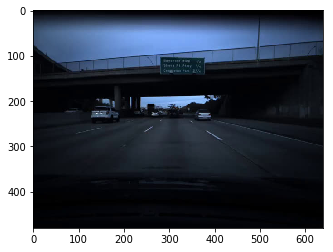

speed: 28.105569
shape: (480, 640, 3)


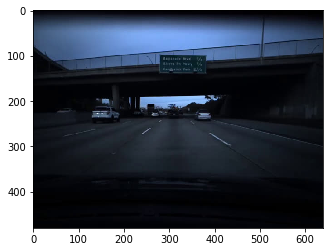

speed: 28.106527000000003
shape: (480, 640, 3)


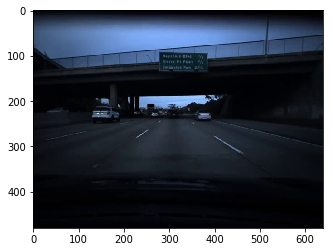

speed: 28.130404
shape: (480, 640, 3)


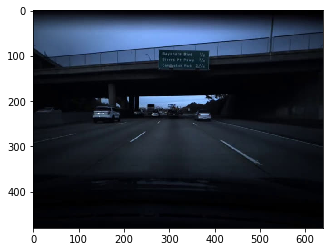

speed: 28.109243
shape: (480, 640, 3)


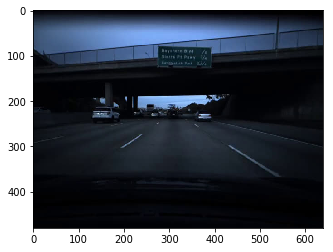

In [15]:
for i in range(5):
    print('speed:',train_meta['speed'][i] )
    img=mpimg.imread(train_meta['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

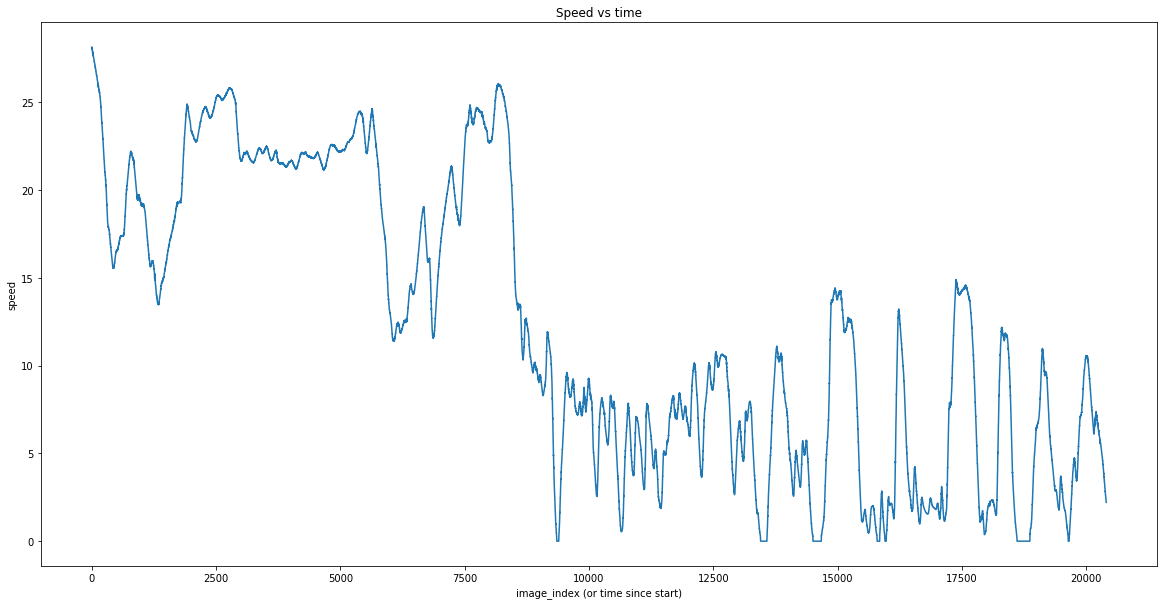

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(train_meta['speed'])
plt.xlabel('image_index (or time since start)')
plt.ylabel('speed')
plt.title('Speed vs time')
plt.show()

In [18]:
test_meta = pd.read_csv(os.path.join(PREPARED_DATA_PATH, 'test_meta.csv'))
assert(test_meta.shape[0] == TEST_FRAMES)
assert(test_meta.shape[1] == 3)

In [19]:
test_meta.head()

,image_path,image_index,speed
0,/home/ubuntu/repositories/speed-challenge/prep...,0,NaN
1,/home/ubuntu/repositories/speed-challenge/prep...,1,NaN
2,/home/ubuntu/repositories/speed-challenge/prep...,2,NaN
3,/home/ubuntu/repositories/speed-challenge/prep...,3,NaN
4,/home/ubuntu/repositories/speed-challenge/prep...,4,NaN


speed: nan
shape: (480, 640, 3)


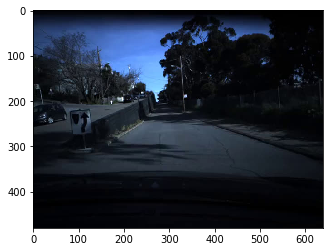

speed: nan
shape: (480, 640, 3)


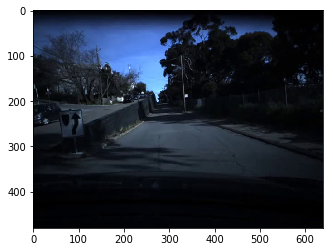

speed: nan
shape: (480, 640, 3)


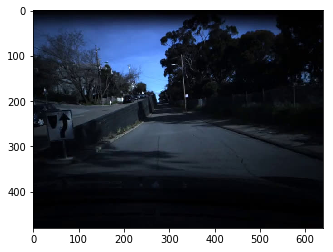

speed: nan
shape: (480, 640, 3)


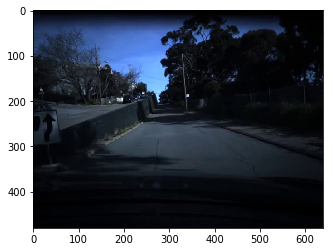

speed: nan
shape: (480, 640, 3)


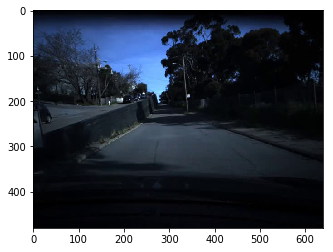

In [20]:
for i in range(5):
    print('speed:',test_meta['speed'][i] )
    img=mpimg.imread(test_meta['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()